Задание 2-построение графа системы
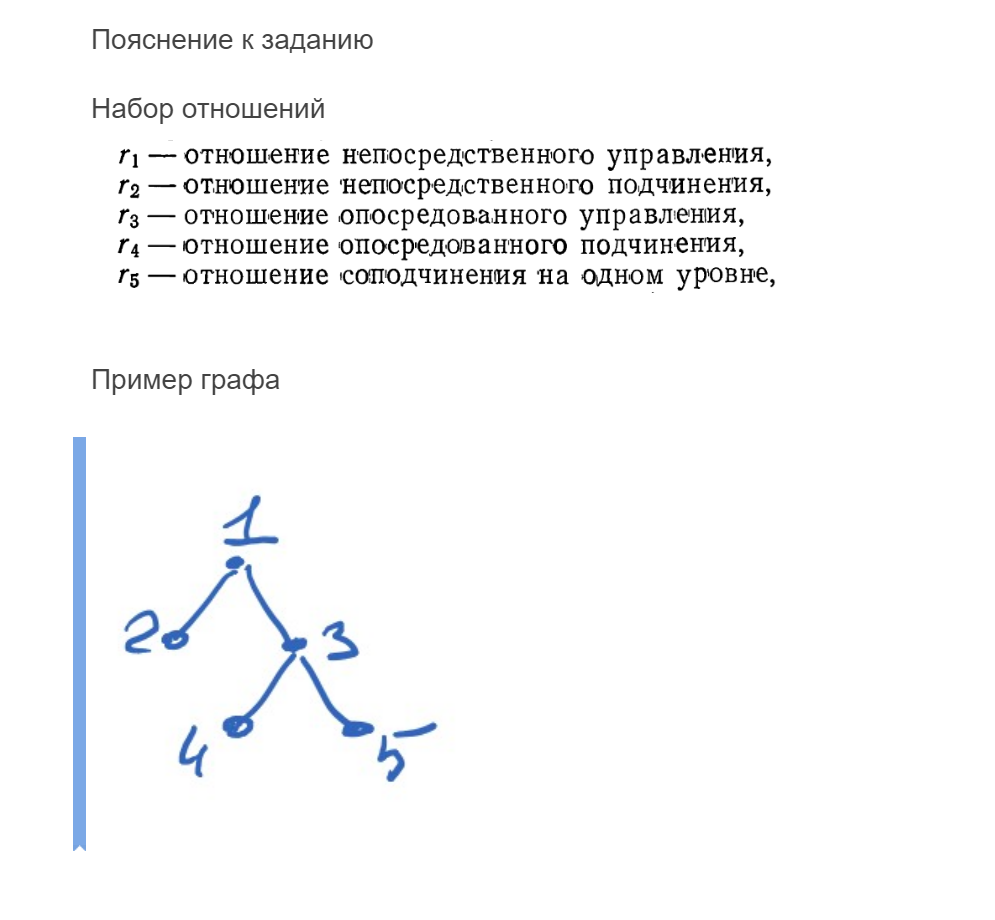


На изображении показан набор из пяти типов отношений, которые можно рассмотреть в контексте системного анализа с использованием графов:

1. r₁ — отношение непосредственного управления  
   Это отношение между двумя элементами системы, где один элемент (*A*) управляет другим элементом (*B*) напрямую. В графе это будет представлено ребром, направленным от узла *A* к узлу *B*. Например, начальник управляет своим подчинённым.

2. r₂ — отношение непосредственного подчинения  
   Это обратное отношение к *r₁*. Элемент *B* находится в непосредственном подчинении у элемента *A*. В графе это также представляется ребром от *A* к *B*, но с акцентом на то, что *B* подчиняется *A*. Пример: сотрудник подчиняется своему начальнику.

3. r₃ — отношение опосредованного управления  
   В этом случае элемент *A* управляет элементом *B* через одного или более промежуточных элементов. В графе это выражается как путь, состоящий из нескольких рёбер, связывающий узлы *A* и *B*. Например, директор компании может косвенно управлять сотрудниками через менеджеров.

4. r₄ — отношение опосредованного подчинения  
   Элемент *B* подчиняется элементу *A* через промежуточные звенья. Это обратное отношение к *r₃*. В графе это будет выражено путём из нескольких рёбер, где *B* через несколько шагов подчиняется *A*. Например, рядовой сотрудник подчиняется высшему руководству через своего непосредственного начальника.

5. r₅ — отношение соподчинения на одном уровне  
   Это отношение между элементами, находящимися на одном уровне иерархии и не имеющими между собой прямого управления или подчинения. В графе такое отношение может быть представлено ненаправленным ребром между узлами, что указывает на их равенство в структуре. Пример: два менеджера находятся на одном уровне управления и не подчиняются друг другу.

Эти отношения помогают строить модели взаимодействий в сложных системах, где важно понимать не только прямое управление и подчинение, но и более сложные, косвенные связи между элементами.

In [36]:
import csv
import numpy as np
import pandas as pd
from io import StringIO

file=pd.read_csv('task2.csv',dtype=int)
file=file.shift(0)

pairs=['pair1','pair2']
roles=['top','low']
file=pd.DataFrame(file,index=pairs,columns=roles)
with open('task2.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    matrix = [row for row in reader]
for i in range(len(matrix)):
    for j in range(2):
        matrix[i][j]=int(matrix[i][j])
matrix=np.array(matrix)
print(matrix.shape[0])
result = [ [0]*5 for i in range(5)]#инициализируем матрицу для заполнения результатами 
print(len(result))

4
5


In [48]:

from io import StringIO

def main() -> str:
    # Чтение CSV-файла 'task2.csv'
    edges = []
    with open('task2.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            edges.append((int(row[0]), int(row[1])))  # Чтение ребер из файла

    # Определим количество узлов (максимальный номер узла)
    nodes = set()
    for edge in edges:
        nodes.update(edge)
    num_nodes = max(nodes)  # Максимальная вершина определяет количество узлов
    
    # Инициализация матрицы смежности
    adj_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    
    # Заполняем матрицу смежности
    for edge in edges:
        adj_matrix[edge[0] - 1][edge[1] - 1] = 1  # Ребро от node A к node B

    # Инициализируем матрицу для хранения результатов (r₁ - r₅ для каждого узла)
    result_matrix = np.zeros((num_nodes, 5), dtype=int)

    # r₁: непосредственное управление (прямые связи)
    result_matrix[:, 0] = np.sum(adj_matrix, axis=1)

    # r₂: непосредственное подчинение (обратные связи)
    result_matrix[:, 1] = np.sum(adj_matrix, axis=0)

    # r₃: опосредованное управление (косвенные связи)
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j and adj_matrix[i][j] == 0:
                paths = np.dot(adj_matrix[i], adj_matrix[:, j])
                if paths > 0:
                    result_matrix[i, 2] += 1

    # r₄: опосредованное подчинение (обратные косвенные связи)
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j and adj_matrix[j][i] == 0:
                paths = np.dot(adj_matrix[j], adj_matrix[:, i])
                if paths > 0:
                    result_matrix[i, 3] += 1

    # r₅: соподчинение на одном уровне (узлы с одинаковым уровнем управления)-???
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j and adj_matrix[i, j] == 0 and adj_matrix[j, i] == 0:
                result_matrix[i, 4] += 1

    # Преобразование результата в CSV строку
    output = StringIO()
    writer = csv.writer(output)
    writer.writerows(result_matrix)
    return output.getvalue()

# Запуск функции
if __name__ == "__main__":
    print(main())

2,0,2,0,2
0,1,0,0,3
2,1,0,0,1
0,1,0,1,3
0,1,0,1,3



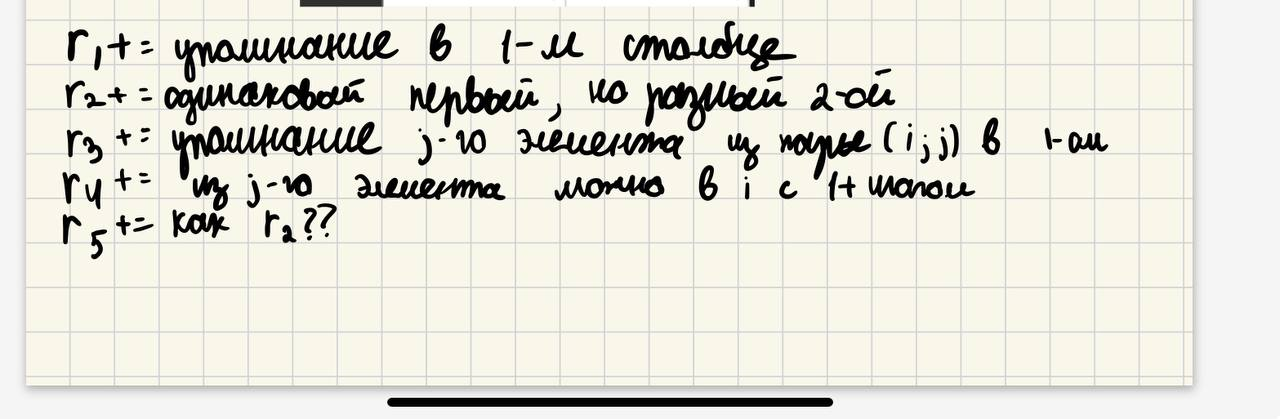